# Iris Veri Seti İle Sınıflandırma Algoritmaları

Veri seti hakkında detaylı bilgi için [buraya](https://en.wikipedia.org/wiki/Iris_flower_data_set) bakabilirsin.

Amacımız veri setindeki dört özelliği göz önüne alarak çiçeğin hangi türden olduğunu belirlemek.

## Özellikler

<b>`sepal length` -> çanak yaprak uzunluğu , `petal length` -> taç yaprak uzunluğu</b>

<b>`sepal width` -> çanak yaprak genişliği , `petal width` -> taç yaprak genişliği</b>

## Türler

<b>`setosa`, `versicolor`, `virginica`</b>

## Gerekli Kütüphanler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# verinin yüklenmesi
df = pd.read_excel('Iris.xls')

In [3]:
# verinin ilk 5 satırı  
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# verinin satır ve sutun sayısı
df.shape

(150, 5)

Veri seti 150 satır ve 5 sutundan oluşuyor.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri setinde 4 adet sayısal (float64) ve 1 adet de kategorik (object) tipinde değişkenden oluşuyor.

In [6]:
# iris sutunundaki unique değerlere bakalım
df['iris'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<b>iris sutunundaki değerlerin başında `Iris` ifadesi bulunuyor. Değerleri daha net görmek için aşağıdaki işlemi yapacağız.</b>

In [7]:
df['iris'] = df['iris'].apply(lambda x: 'setosa' if x == 'Iris-setosa' else x)
df['iris'] = df['iris'].apply(lambda x: 'versicolor' if x == 'Iris-versicolor' else x)
df['iris'] = df['iris'].apply(lambda x: 'virginica' if x == 'Iris-virginica' else x)

In [8]:
# istediğimiz formata gelmişler mi bakalım
df['iris'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
# her türden kaç adet olduğuna bakalım
df['iris'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: iris, dtype: int64

Veri seti oldukça dengeli bir dağılım gösteriyor, her türden eşit sayıda var.

## Exploratory Data Analysis (EDA) 
### Keşifsel Veri Analizi

In [10]:
# betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Mesela bu istatistiklerden bir iris çiçeğinin maksimum Çanak yaprak uzunluğunun (sepal length) 7.9 cm, minimum uzunluğun ise 4.3 cm olduğunu görebiliriz.

In [11]:
# özellikleri türlerine göre gruplayalım ve betimsel istatistiklerine bakalım
df.groupby('iris').agg(['std','mean','min','max'])

sepal length                  sepal width                   \
                    std   mean  min  max         std   mean  min  max   
iris                                                                    
setosa         0.352490  5.006  4.3  5.8    0.381024  3.418  2.3  4.4   
versicolor     0.516171  5.936  4.9  7.0    0.313798  2.770  2.0  3.4   
virginica      0.635880  6.588  4.9  7.9    0.322497  2.974  2.2  3.8   

           petal length                  petal width                   
                    std   mean  min  max         std   mean  min  max  
iris                                                                   
setosa         0.173511  1.464  1.0  1.9    0.107210  0.244  0.1  0.6  
versicolor     0.469911  4.260  3.0  5.1    0.197753  1.326  1.0  1.8  
virginica      0.551895  5.552  4.5  6.9    0.274650  2.026  1.4  2.5

Setosa'nın çanak yaprak uzunluğu (sepal length) ve taç yaprak genişliği (petal width) değerlerinin diğerlerinden daha düşük seviyede olduğunu söyleyebiliriz.

In [12]:
# korelasyon
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


Petal length ile petal width arasında pozitif yönde yüksek bir ilişki olduğu görülüyor ayrıca sepal length ile petal length ve petal width ile sepal length arasında da yüksek bir ilişki olduğu söylenebilir. 

In [13]:
# eksik değer var mı
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
iris            0
dtype: int64

Veri setinde eksik değer yoktur.

## Görselleştirme

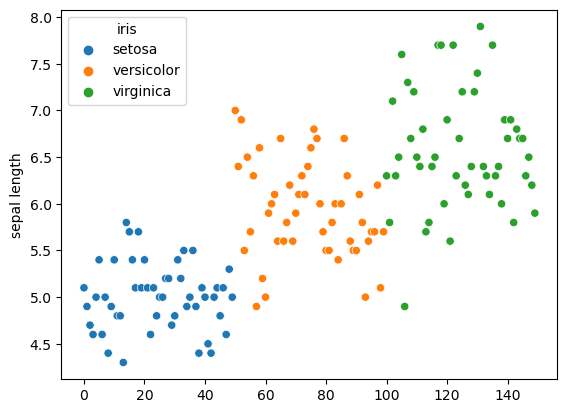

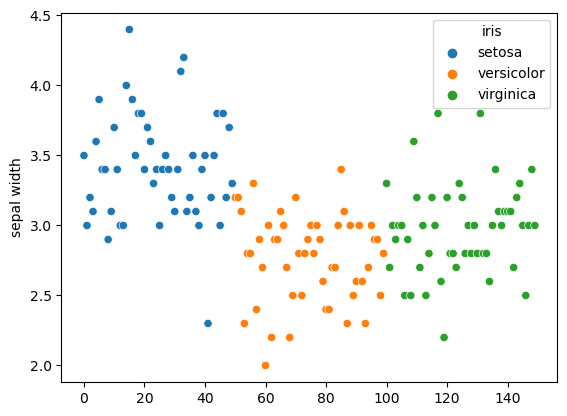

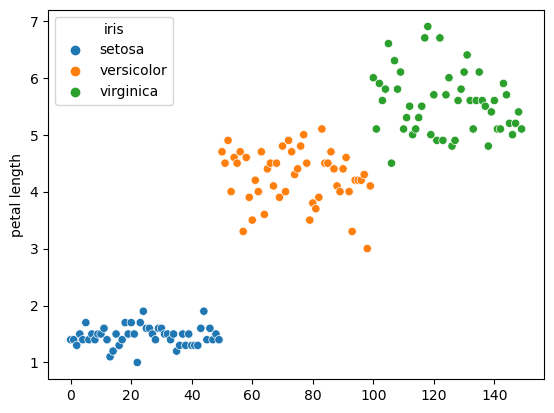

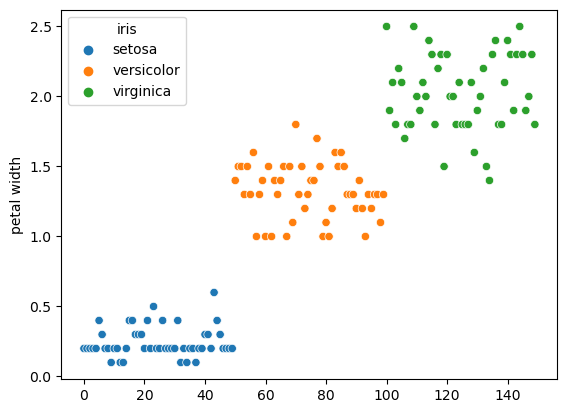

In [14]:
for i in df.columns[0:-1]:
    sns.scatterplot(data=df, x=df.index, y=i, hue='iris')
    plt.show()

Setosa türü genel olarak daha ufak boyutlara sahiptir ve grafiklerde daha az saçılım göstermiştir. Betimsel istatistiklerde de standart sapmasının daha düşük olduğunu görebiliriz. Versicolor türü ortalama boyutlardadır. Virginica türü ise boyut olarak büyüktür ve geniş bir alana saçılım göstermiştir.

### 1,2 ve 3 boyutlu olarak veriyi görselleştirelim

Esasen veri setimizde 4 özellik olduğu için verimiz 4 boyutlu fakat maksimum 3. boyuta kadar görselleştirebiliyoruz.

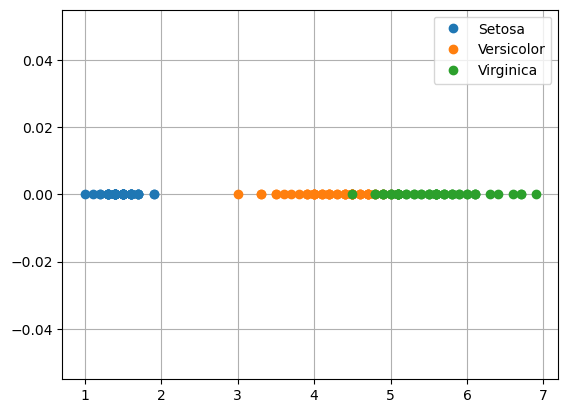

In [15]:
# 1 boyutlu
iris_setosa = df.loc[df["iris"] == "setosa"];
iris_virginica = df.loc[df["iris"] == "virginica"];
iris_versicolor = df.loc[df["iris"] == "versicolor"];
plt.plot(iris_setosa["petal length"],np.zeros_like(iris_setosa["petal length"]), 'o', label="Setosa")
plt.plot(iris_versicolor["petal length"],np.zeros_like(iris_versicolor["petal length"]), 'o', label="Versicolor")
plt.plot(iris_virginica["petal length"],np.zeros_like(iris_virginica["petal length"]), 'o', label="Virginica")
plt.grid()
plt.legend()
plt.show()

Virginica ve Versicolor türlerinin üst üste bindiği görülüyor.

<b>Veri setini 2 ve 3 boyutlu olarak görselleştirmek için dokümantasyondaki kodu kullandık. Sayfaya ulaşmak için [buraya](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) tıklayabilirsin.</b>

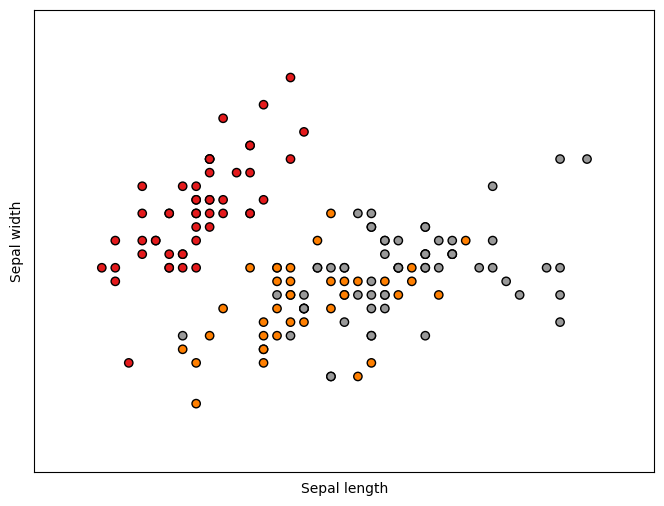

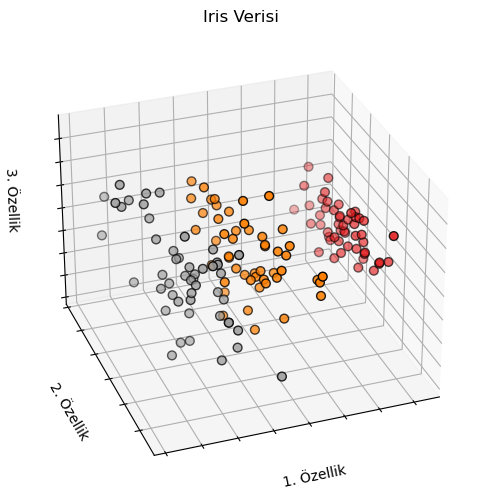

In [16]:
# gerekli kütüphaneler ve paketler
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.decomposition import PCA

# veri setinin yüklenmesi
iris = datasets.load_iris()

# sadece ilk özelliği seçtik
X = iris.data[:, :2] 
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# eğitim noktalarını çizdirelim
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# ilk üç PCA bileşenini boyutların nasıl etkileştiğini daha iyi anlamak için çizdirelim
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40,
)

ax.set_title('Iris Verisi')
ax.set_xlabel("1. Özellik")
ax.xaxis.set_ticklabels([])
ax.set_ylabel('2. Özellik')
ax.yaxis.set_ticklabels([])
ax.set_zlabel('3. Özellik')
ax.zaxis.set_ticklabels([])

plt.show()

2 boyutlu grafiğe baktığımızda kırmızı noktalar bir çizgi ile diğerlerinden kolayca ayrılabilir gibi duruyor. Turuncu ve gri noktalar ise iç içe geçmiş bir halde bulundukları için kolayca ayrılamayacağa benziyor. Yani Versicolor'u Viginica'dan ayırmak, büyük oranda bir üst üste gelme olduğu için çok daha zorlu olacaktır.

### Sayısal Değerlerin Dağılımı

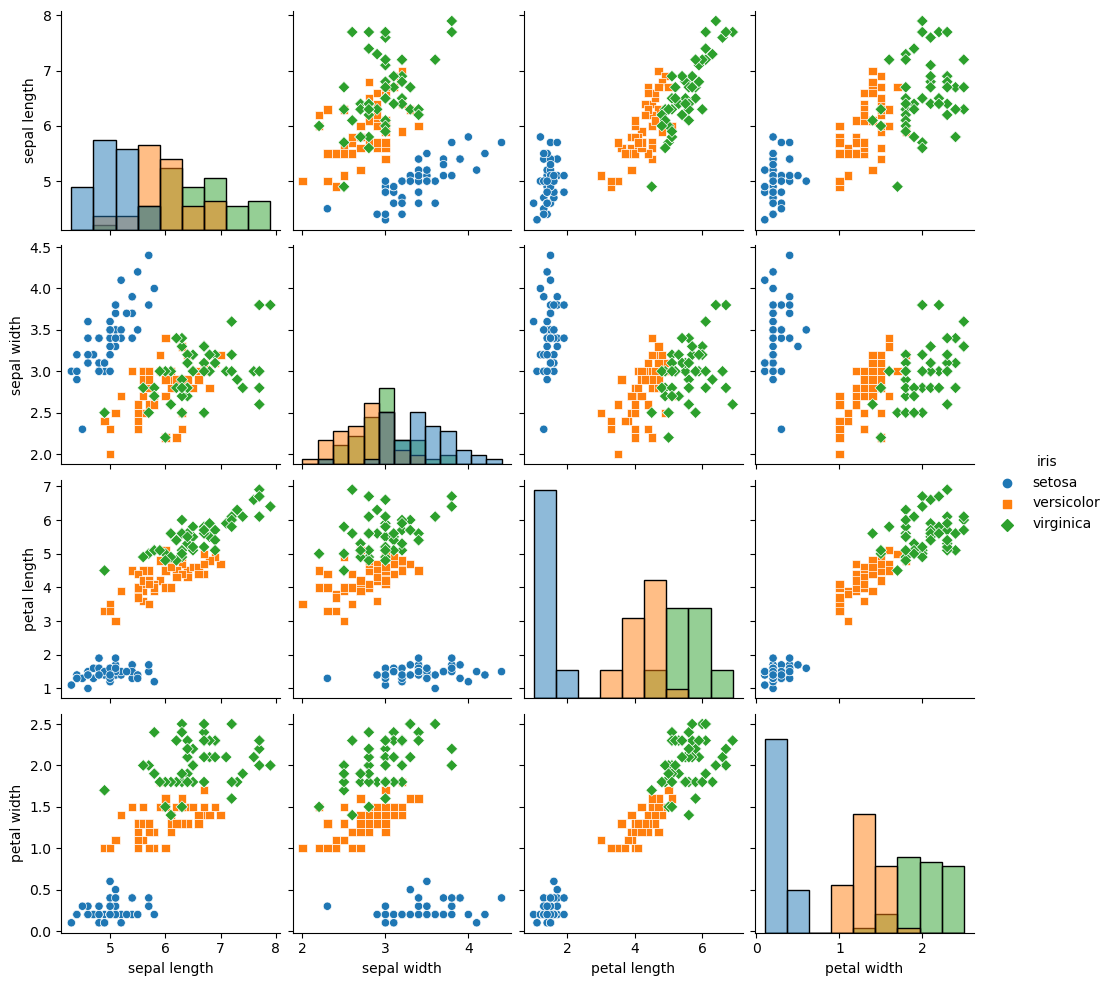

In [17]:
sns.pairplot(df, hue = 'iris', diag_kind = 'hist', markers = ['o', 's', 'D'])

### Kutu Grafiği

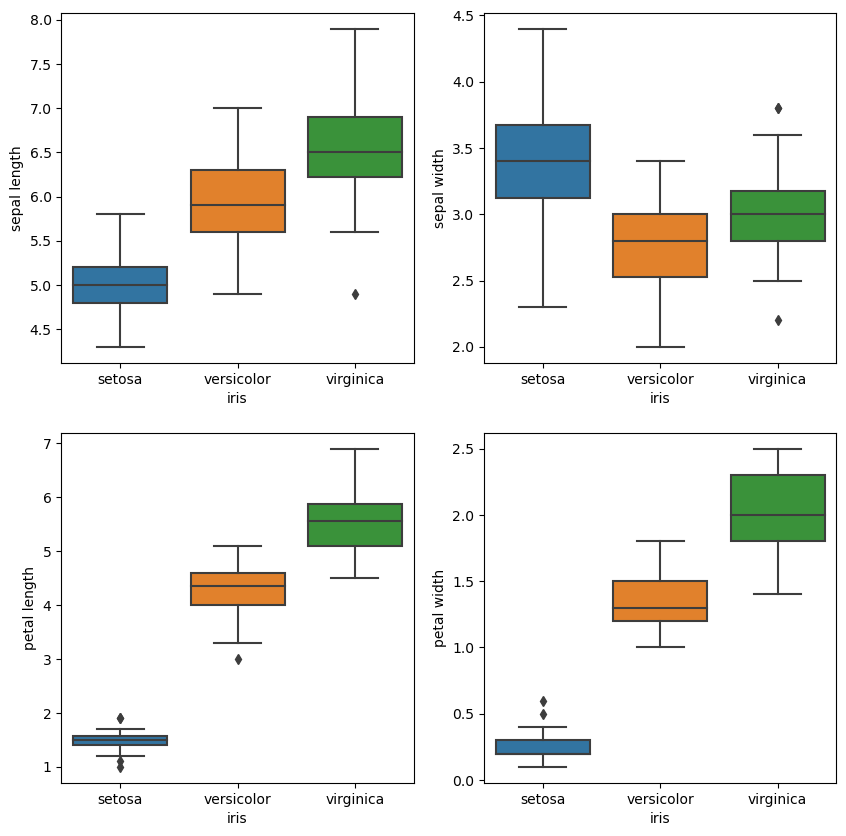

In [18]:
def grafik(y):
    sns.boxplot(x='iris', y=y, data=df)
plt.figure(figsize=(10,10)) 

plt.subplot(221)
grafik('sepal length')
 
plt.subplot(222)
grafik('sepal width')
 
plt.subplot(223)
grafik('petal length')
 
plt.subplot(224)
grafik('petal width')
 
plt.show()

Kutu grafiklerine baktığımızda veri setinde aykırı değerler var gibi gözükse de bunlara dokunmayacağım çünkü zaten sayıları az olduğu için modele çok bir etkileri olmayacaktır.

## Veri Ön İşleme

### Label Encoding
Makine öğrenemesi modelleri sayısal verilerle çalıştığı için `iris` sutununu label encoding yöntemi ile modelin anlayabileceği hale dönüştüreceğiz.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['iris'] = le.fit_transform(df['iris'])

### Verilerin eğitim ve test için bölünmesi

In [20]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,1:4].values #bağımsız değişkenler
y = df.iloc[:,4:].values #bağımlı değişken
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

### Verilerin Ölçeklenmesi

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

## Model Kurulumu

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Lojistik Regresyon\n',cm)

Lojistik Regresyon
 [[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


![lojistik-regresyon](Resimler/lojistik-cm.png)

Matrise baktığımızda 50 adet test verisinden 16 adet setosa türünün hepsinin doğru sınıflandırıldığı, 19 adet versicolor türünden 1 adet yanlış sınıflandırıldığını ve 15 adet virginica türünden 2 tanesinin yanlış sınıflandırıldığı görüyoruz.

### K Neighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('KNN')
print(cm)

KNN
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


![knn-algoritması](Resimler/knn-cm.png)

### Support Vector Machine

In [25]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)

SVC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


![svc-algoritması](Resimler/svc-cm.png)

### Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)

GNB
[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]


![bayes-algoritması](Resimler/bayes-cm.png)

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)

DTC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


![karar-agaci-algoritması](Resimler/karar-cm.png)

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)

RFC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


![random-forest-algoritması](Resimler/random-cm.png)

### XGBoost

In [29]:
import xgboost as xgb
xgb_cls = xgb.XGBClassifier(objective='multiclass:softmax', num_class=3)
xgb_cls.fit(X_train,y_train)
y_pred = xgb_cls.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('XGBoost')
print(cm)

XGBoost
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


![xgboost-algoritması](Resimler/xg-cm.png)

## Iris Verisi Üzerinden Sınıflandırma Algoritmalarının Karşılaştırılması

![hepsi](Resimler/hepsi3.png)

![karşılaştırma](Resimler/karsilastirma.png)

## Veriler 80/20 şeklinde bölündüğünde çıkan confusion matrixler
![cmHepsi](Resimler/cm_hepsi.png)

<b>Burada kabaca confusion matrixler üzerinden sınıflandırma algoritmalarına baktık. Veri setinde az değer olduğu için algoritmaların hepsi başarılı bir iş çıkarmış diyebiliriz.</b> 

### Öneriler
Bu notebboku buraya kadar incelemiş olan varsa bir kaç tane kaynak önerisinde bulunmak istiyourm. Bu kaynaklar benimde bu notebooku hazırlarken faydalandığım kaynaklardır.

İlk olarak açıklayıcı bir eğitim serisi olduğunu düşündüğüm [bu](https://www.youtube.com/playlist?list=PLk54I7lqQSsbsxz-LWIOt6mrO5n0mpe-J) playliste bakabilirsiniz. Türkçe olarak makine öğrenmesine giriş niteliğinde iris verisi üzerinden sınıflandırma anlatılıyor.

Türkçe olarak sınıflandırmanın anlatıldığı [bu](https://www.kaggle.com/code/hasansezertaan/machine-learning-dersleri-s-n-fland-rma) notebooku da öneririm.

Son olarak iris verisinin güzel bir analizi olan [bu](https://www.kaggle.com/code/caesarmario/iris-eda-classification-and-clustering) noteebooka da bakabilirisiniz.